In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
df = pd.read_csv('SeattleFleetEquipmentSales.csv', parse_dates=['SALE_DATE'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
EQUIP_ID          1055 non-null object
YEAR              1055 non-null int64
MAKE              1055 non-null object
MODEL             1055 non-null object
DESCRIPTION       1055 non-null object
DEPT              1055 non-null object
SALE_PRICE        1055 non-null float64
SALE_DATE         1055 non-null datetime64[ns]
SOLD_BY           1055 non-null object
VIN               1055 non-null object
Equipment Type    1055 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 90.7+ KB


In [4]:
df['SALE_YEAR'] = pd.DatetimeIndex(df['SALE_DATE']).year

In [5]:
df['EQUIPMENT_AGE'] = df['SALE_YEAR'] - df['YEAR']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 13 columns):
EQUIP_ID          1055 non-null object
YEAR              1055 non-null int64
MAKE              1055 non-null object
MODEL             1055 non-null object
DESCRIPTION       1055 non-null object
DEPT              1055 non-null object
SALE_PRICE        1055 non-null float64
SALE_DATE         1055 non-null datetime64[ns]
SOLD_BY           1055 non-null object
VIN               1055 non-null object
Equipment Type    1055 non-null object
SALE_YEAR         1055 non-null int64
EQUIPMENT_AGE     1055 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 107.2+ KB


In [7]:
df = pd.get_dummies(df, columns=['DEPT','SOLD_BY','MAKE','MODEL','Equipment Type','DESCRIPTION'])

In [8]:
df.describe()

,YEAR,SALE_PRICE,SALE_YEAR,EQUIPMENT_AGE,DEPT_CEN,DEPT_DON,DEPT_DPR,DEPT_FAS,DEPT_HSD,DEPT_ITD,...,DESCRIPTION_VAN CARGO,DESCRIPTION_VAN CARGO CAMERA WITH GENERATOR 313841,DESCRIPTION_VAN CARGO E250,DESCRIPTION_VAN CARGO SPRINTER 3500 9990GVW,DESCRIPTION_VAN PASSENGER,DESCRIPTION_VAN PASSENGER FULL SIZE,DESCRIPTION_VAN WALK IN,DESCRIPTION_WALKIN VAN - CLASS 4,DESCRIPTION_WHEEL LOADER - 29000 LB,DESCRIPTION_YARD SWEEPER - SELF PROPELLED
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,2006.364929,9061.214493,2017.418009,11.053081,0.019905,0.000948,0.203791,0.036967,0.003791,0.002844,...,0.003791,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.004739,0.003791,0.000948
std,4.511476,12253.906963,1.086688,4.500793,0.139741,0.030787,0.403007,0.188770,0.061487,0.053275,...,0.061487,0.030787,0.030787,0.030787,0.030787,0.030787,0.030787,0.068712,0.061487,0.030787
min,1940.000000,0.000000,2016.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,3014.500000,2016.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,5500.000000,2017.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,9700.000000,2018.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,145000.000000,2019.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


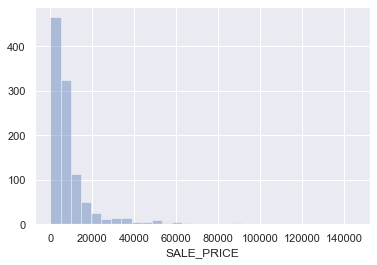

In [9]:
sns.distplot(df['SALE_PRICE'], kde=False, bins=30)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [11]:
feature_col = df.select_dtypes(include=['integer'])

In [12]:
features = feature_col.columns.values

In [13]:
features = features[features != 'SALE_YEAR']

In [14]:
print("Total number of features: ", features.size)

Total number of features:  641


In [15]:
target = 'SALE_PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [16]:
rf = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=99)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=True, random_state=99, verbose=0,
                      warm_start=False)

In [17]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [18]:
# top 10 features by importance
fi = rf_feat_importance(rf, X_train)
fi[:10]

,cols,imp
72,MAKE_PETERBILT,0.278126
0,YEAR,0.074434
55,MAKE_JOHN DEERE,0.050741
337,Equipment Type_TRUCK - DUMP TRUCK,0.049614
57,MAKE_KENWORTH,0.045951
11,DEPT_SPD,0.040232
254,MODEL_T800B,0.035504
1,EQUIPMENT_AGE,0.033735
13,DEPT_SPU,0.033714
288,Equipment Type_EXCAVATOR,0.022030


In [19]:
from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

train_score = r2_score(y_train, predicted_train)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'R^2 score Train data : {train_score:>5.3}')
print(f'R^2 score Test data: {test_score:>5.3}')
print(f'R^2 score Out-of-bag estimate: {rf.oob_score_:>5.3}')
print(f'Spearman correlation Test data : {spearman[0]:.3}')
print(f'Pearson correlation Test data : {pearson[0]:.3}')

R^2 score Train data : 0.939
R^2 score Test data: 0.876
R^2 score Out-of-bag estimate: 0.636
Spearman correlation Test data : 0.873
Pearson correlation Test data : 0.937


In [20]:
# find best hyperparameters using GridSearch
from sklearn.model_selection import GridSearchCV

n_estimators = [200, 250]
max_depth = [50, 75, 100]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, n_jobs=-1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   43.7s finished


In [21]:
bestF.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [24]:
predicted_test_bf = bestF.predict(X_test)
test_score_bf = r2_score(y_test, predicted_test_bf)

print(f'R^2 score Test data: {test_score:>5.3}')
print(f'R^2 score Test data (best fit): {test_score_bf:>5.3}')
print(f'R^2 score improvement of: {test_score_bf - test_score :>5.3}')

R^2 score Test data: 0.876
R^2 score Test data (best fit): 0.881
R^2 score improvement of: 0.00466


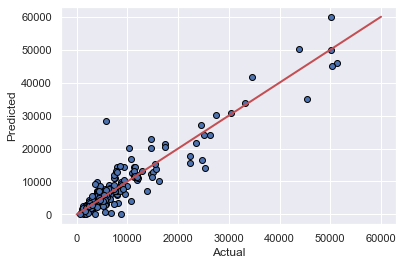

In [23]:
y_pred = bestF.predict(X_test)

# Build a plot
plt.scatter(y_pred, y_test,edgecolors=(0, 0, 0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r', lw=2)
plt.show()